In [1]:
#import libraries
import requests
import pandas as pd
import time

In [2]:
#keys
API_KEY = 'private'
CHANNEL_ID = 'UCNBVa0EN2XOlojmj9sV_41A'

In [3]:
#make API call

url = 'https://youtube.googleapis.com/youtube/v3/search'+'?part=snippet&maxResults=25&q=surfing&key='+API_KEY
response = requests.get(url).json()

In [4]:
response

{'kind': 'youtube#searchListResponse',
 'etag': '9cLfYYwt-8hqFgFPX6UfSzVsoe0',
 'nextPageToken': 'CBkQAA',
 'regionCode': 'US',
 'pageInfo': {'totalResults': 1000000, 'resultsPerPage': 25},
 'items': [{'kind': 'youtube#searchResult',
   'etag': 'UXnJyj-S0I52OMSTAZ0eekC8KB0',
   'id': {'kind': 'youtube#video', 'videoId': 'a9dWI467CbI'},
   'snippet': {'publishedAt': '2022-02-02T21:26:23Z',
    'channelId': 'UChuLeaTGRcfzo0UjL-2qSbQ',
    'title': 'WATCH LIVE Billabong Pro Pipeline - Day 4',
    'description': 'ATTN: This Billabong Pro Pipeline stream will stop at the end of the Round of 16 and a new live stream will begin for the ...',
    'thumbnails': {'default': {'url': 'https://i.ytimg.com/vi/a9dWI467CbI/default.jpg',
      'width': 120,
      'height': 90},
     'medium': {'url': 'https://i.ytimg.com/vi/a9dWI467CbI/mqdefault.jpg',
      'width': 320,
      'height': 180},
     'high': {'url': 'https://i.ytimg.com/vi/a9dWI467CbI/hqdefault.jpg',
      'width': 480,
      'height': 36

In [5]:
response['items']

[{'kind': 'youtube#searchResult',
  'etag': 'UXnJyj-S0I52OMSTAZ0eekC8KB0',
  'id': {'kind': 'youtube#video', 'videoId': 'a9dWI467CbI'},
  'snippet': {'publishedAt': '2022-02-02T21:26:23Z',
   'channelId': 'UChuLeaTGRcfzo0UjL-2qSbQ',
   'title': 'WATCH LIVE Billabong Pro Pipeline - Day 4',
   'description': 'ATTN: This Billabong Pro Pipeline stream will stop at the end of the Round of 16 and a new live stream will begin for the ...',
   'thumbnails': {'default': {'url': 'https://i.ytimg.com/vi/a9dWI467CbI/default.jpg',
     'width': 120,
     'height': 90},
    'medium': {'url': 'https://i.ytimg.com/vi/a9dWI467CbI/mqdefault.jpg',
     'width': 320,
     'height': 180},
    'high': {'url': 'https://i.ytimg.com/vi/a9dWI467CbI/hqdefault.jpg',
     'width': 480,
     'height': 360}},
   'channelTitle': 'World Surf League',
   'liveBroadcastContent': 'none',
   'publishTime': '2022-02-02T21:26:23Z'}},
 {'kind': 'youtube#searchResult',
  'etag': '1MT578bemWqsFkhWS3K3VMJc8po',
  'id': {'kind':

In [6]:
type(response['items'])

list

In [7]:
video_id = response['items'][0]['id']['videoId']
video_id

'a9dWI467CbI'

In [8]:
video_title = response['items'][0]['snippet']['title']
video_title

'WATCH LIVE Billabong Pro Pipeline - Day 4'

In [9]:
upload_date = response['items'][0]['snippet']['publishedAt']
upload_date = str(upload_date).split("T")[0]
upload_date

'2022-02-02'

In [10]:
import pandas as pd

#set variable 'x' to 0
x=0
#Create 3 empty lists
video_title = [] 
video_id = []
date_created = []

#create while loop to go through title, video_id and date_created variables.
#Append each variable to empty list and then increase variable by +1
while x < len(response['items']):
    video_title.append(response['items'][x]['snippet']['title'])
    video_id.append(response['items'][x]['id']['videoId'])
    date_created.append(response['items'][x]['snippet']['publishedAt'].split("T")[0])
    x=x+1

#For each video_id, call youtube API , get ...
#'view_count', 'like_count', 'dislike_count', and 'comment_count'

#GET https://youtube.googleapis.com/youtube/v3/videos?part=snippet%2Cstatistics&id=ma67yOdMQfs&id=53mgyiduKqE&maxResults=25&key=[YOUR_API_KEY] HTTP/1.1
#Call Youtube API and get video statistics which include likes, favorites, comments, views

x=0
response2=[]
while x < (len(video_id)):
    url2 = 'https://youtube.googleapis.com/youtube/v3/videos?part=snippet%2Cstatistics'+'&id='+video_id[x]+'&maxResults=25&key='+API_KEY
    response2.append(requests.get(url2).json())
    x=x+1 

x=0
y=0
viewCount = []
likeCount = []
favoriteCount = []
commentCount = []
channelTitle=[]

while (x < len(response2)):
    channelTitle.append(response2[x]['items'][0]['snippet']['channelTitle'])
    viewCount.append(response2[x]['items'][0]['statistics']['viewCount'])
    favoriteCount.append(response2[x]['items'][0]['statistics']['favoriteCount'])
    commentCount.append(response2[x]['items'][0]['statistics']['commentCount'])
    try:
        likeCount.append(response2[x]['items'][0]['statistics']['likeCount'])
    except:
        likeCount.append(0) 
    x=x+1
     

#print(video_title, video_id)
df = pd.DataFrame({'channelTitle': channelTitle,'video_title': video_title,'video_id': video_id,
            'date_created': date_created, 'viewCount': viewCount,'favoriteCount': favoriteCount,
            'commentCount': commentCount, 'likeCount' : likeCount})

df

,channelTitle,video_title,video_id,date_created,viewCount,favoriteCount,commentCount,likeCount
0,World Surf League,WATCH LIVE Billabong Pro Pipeline - Day 4,a9dWI467CbI,2022-02-02,164504,0,12,0
1,World Surf League,Kelly Slater vs Barron Mamiya CRAZY HEAT Billa...,IdyRobbSRGc,2022-02-02,89164,0,136,965
2,Red Bull Surfing,These Were The All-Time Surfing Moments Of The...,ma67yOdMQfs,2021-01-23,1240635,0,265,10630
3,Chris Kincade Media - Waves of the World,🔴4k Pipeline Surf - 1/21/22 - Does it Get Much...,HB2jZut-Wnc,2022-01-24,24230,0,26,169
4,Jamie O'Brien,THE MOST CROWDED PIPELINE EVER! (ITS GETTING W...,mRHG2lWvF4A,2022-01-24,516940,0,653,8683
5,World Surf League,WATCH LIVE Billabong Pro Pipeline - Day 1,8OTAm1IE818,2022-01-30,403916,0,54,0
6,Jamie O'Brien,WHAT ITS LIKE TO GET SLAMMED ON THE REEF (PUMP...,8aivIo9FGME,2022-01-31,155108,0,368,5343
7,World Surf League,Florence vs. Chianca Billabong Pro Pipeline - ...,wPKzfbBUOyc,2022-02-02,65949,0,148,859
8,Paul Topp,SURFING PIPELINE : Full Capacity,o_rC59uylQE,2022-01-22,24347,0,27,189
9,Ben Gravy,Surfing the 2022 California TSUNAMI WARNING,HCXs3xB2Bjk,2022-01-15,157556,0,484,3191


In [12]:
df.head(2)

,channelTitle,video_title,video_id,date_created,viewCount,favoriteCount,commentCount,likeCount
0,World Surf League,WATCH LIVE Billabong Pro Pipeline - Day 4,a9dWI467CbI,2022-02-02,164504,0,12,0
1,World Surf League,Kelly Slater vs Barron Mamiya CRAZY HEAT Billa...,IdyRobbSRGc,2022-02-02,89164,0,136,965


In [13]:
## FIND CORRELATION BETWEEN DIFFERENT COUNTS

In [14]:

correlations = df[['likeCount', 'commentCount', 'favoriteCount', 'viewCount']].astype(float)
correlations.corr()

,likeCount,commentCount,favoriteCount,viewCount
likeCount,1.000000,0.98052,NaN,0.919005
commentCount,0.980520,1.00000,NaN,0.874220
favoriteCount,NaN,NaN,NaN,NaN
viewCount,0.919005,0.87422,NaN,1.000000


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


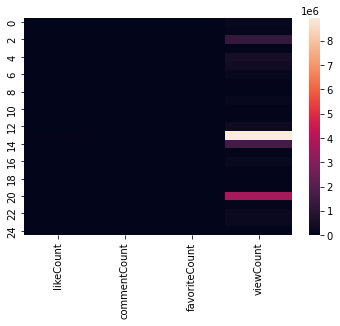

In [16]:
sns.heatmap(correlations)
plt.show()